In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The market for melatonin products is very chaotic, with products of various doses abounding.
#The purpose of this assignment is to analyze the proportion of various products
#(such as 1mg, 2mg, 5mg, 10mg, etc.) based on this data.

In [ ]:
pip install textblob

In [ ]:
#imports which I used for this assignment.

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
v1 = "//content/drive/MyDrive/melatonin/B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin-2mg.csv"
v1_Puritans = pd.read_csv(v1)

In [6]:


v2 = "/content/drive/MyDrive/melatonin/B079TD7HG2_NatrolMelatoninSleepAidGummy-10mg.csv"
v2_Carlyle300 = pd.read_csv(v2)

v3 = "/content/drive/MyDrive/melatonin/B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets-12mg.csv"
v3_Carlyle180 = pd.read_csv(v3)

v4 = "/content/drive/MyDrive/melatonin/B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies-1mg.csv"
v4_Natrol = pd.read_csv(v4)

v5 = "/content/drive/MyDrive/melatonin/B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements-10mg.csv"
v5_VitamaticMelatonin = pd.read_csv(v5)

v6 = "/content/drive/MyDrive/melatonin/B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets-12mg.csv"
v6_vitafusionMaxStrength = pd.read_csv(v6)

v7 = "/content/drive/MyDrive/melatonin/B08CGYFB2Q_VitamaticMelatonin20mgTablets-20mg.csv"
v7_ZzzQuilPure = pd.read_csv(v7)

# print the dataframe to ensure it loaded correctly
# print(v1_Puritans.head())
# print(v2_Carlyle300.head())
# print(v3_Carlyle180.head())
# print(v4_Natrol.head())
# print(v5_VitamaticMelatonin.head())
# print(v6_vitafusionMaxStrength.head())
# print(v7_ZzzQuilPure.head())

In [7]:
# 1. This is a real-world data set, which is messy.
#You need to organize these csv files and merge them into a dataframe.

In [8]:
# (1) Remove unnecessary features.

In [9]:

unn_cols = ['review_author', 'author_badge', 'badge', 'reviewed_product_attribute','review_url',
                        'author_profile_url', 'url', 'input','brand','variant_review_url',
                       'review_comment_count','reviewed_country','reviewed_variant_asin','review_date' ]

# delete the unn_cols in the above declared datasets.
df_1_puritans = v1_Puritans.drop(columns=unn_cols)
df_2_Carlyle300 = v2_Carlyle300.drop(columns=unn_cols)
df_3_Carlyle180 = v3_Carlyle180.drop(columns=unn_cols)
df_4_Natrol = v4_Natrol.drop(columns=unn_cols)
df_5_VitamaticMelatonin = v5_VitamaticMelatonin.drop(columns=unn_cols)
df_6_vitafusionMaxStrength = v6_vitafusionMaxStrength.drop(columns=unn_cols)
df_7_ZzzQuilPure = v7_ZzzQuilPure.drop(columns=unn_cols)

# merge them into a dataframe:
df_8_merged = pd.concat([df_1_puritans, df_2_Carlyle300, df_3_Carlyle180, df_4_Natrol, df_5_VitamaticMelatonin, df_6_vitafusionMaxStrength, df_7_ZzzQuilPure], ignore_index=True)

# print(df_8_merged)

In [10]:
df_8_merged['product_title'].value_counts()

product_title
Carlyle Melatonin 12 mg Fast Dissolve 180 Tablets | Drug Free | Natural Berry Flavor | Vegetarian, Non-GMO, Gluten Free                                                          5000
Puritan's Pride Super Strength Rapid Release Capsules Melatonin 120 Count (Pack of 2)                                                                                            3200
Natrol Melatonin Sleep Aid Gummy, Fall Asleep Faster, Stay Asleep Longer, 2 Gummies Per Serving, Drug Free and Gelatin Free, 10mg, 90 Strawberry Flavored Gummies                2700
vitafusion Max Strength Melatonin Gummy Supplements, Strawberry Flavored, 10 mg Melatonin Sleep Supplements, America’s Number 1 Gummy Vitamin Brand, 50 Day Supply, 100 Count    1950
ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies, Helps You Fall Asleep Naturally, Wildberry Vanilla Flavor, Chamomile Lavender & Valerian Root, 1mg per Gummy, 72 Count            1300
Vitamatic Melatonin 20mg Tablets | Vegetarian, Non-GMO, Gluten Free | HIGH Potency 20 MG | Natural Berry Flavor |                                                                1000
Carlyle Melatonin 12 mg Fast Dissolve 300 Tablets | Drug Free | Natural Berry Flavor | Vegetarian, Non-GMO, Gluten Free                                                           760
Name: count, dtype: int64

In [11]:
# 2) Add a 'dose' column by extracting the dose from "product_title" column.2

In [12]:

# Extracting 'dose' and converting it into numeric form:
df_8_merged['dose'] = df_8_merged['product_title'].str.extract(r'(\d+\.?\d*)\s?mg', expand=False).apply(lambda x: pd.to_numeric(x, errors='coerce'))
# df_8_merged

In [13]:
df_8_merged['dose'].value_counts()

dose
12.0    5760
10.0    4650
1.0     1300
20.0    1000
Name: count, dtype: int64

In [14]:
df_8_merged['dose'].fillna(0, inplace=True)
# df_8_merged

In [15]:
df_8_merged['dose'].value_counts()

dose
12.0    5760
10.0    4650
0.0     3200
1.0     1300
20.0    1000
Name: count, dtype: int64

In [16]:
df_8_merged.columns

Index(['asin', 'product_title', 'average_rating', 'total_reviews',
       'review_rating', 'review_text', 'review_header',
       'no_of_people_reacted_helpful', 'dose'],
      dtype='object')

In [17]:
df_8_merged['review_rating'].value_counts()

review_rating
5    10771
1     1685
4     1555
3     1121
2      778
Name: count, dtype: int64

In [18]:
# Converting 'review_rating' to a numeric form:
df_8_merged['review_rating'] = pd.to_numeric(df_8_merged['review_rating'], errors='coerce')

"""
Purpose: This line converts the values in the 'review_rating' column to numeric.
Handling Errors: If there are any non-numeric values, they will be converted to NaN.
In case of non-numeric or missing value, converts it to NaN
"""

"\nPurpose: This line converts the values in the 'review_rating' column to numeric.\nHandling Errors: If there are any non-numeric values, they will be converted to NaN.\nIn case of non-numeric or missing value, converts it to NaN\n"

In [19]:
# Use pandas cut function to assign sentiment scores
df_8_merged['Sentmnt_Val'] = pd.cut(
    df_8_merged['review_rating'],
    bins=[0, 2, 3, 5],
    labels=['-ve', 'neutral', '+ve'],
    include_lowest=True
)

# Group by dose and calculate the count of each sentiment score for each dose
dose_sentmnt = df_8_merged.groupby('dose')['Sentmnt_Val'].value_counts().unstack().fillna(0)

# Print the result
print(dose_sentmnt)


Sentmnt_Val  -ve  neutral   +ve
dose                           
0.0          510      172  2518
1.0          290       97   913
10.0         635      344  3671
12.0         821      430  4509
20.0         207       78   715


In [20]:
""" Purpose: Categorize 'review_rating' into sentiment scores.
Details: The pd.cut function divides the 'review_rating' values into bins:
Ratings from 0 to 2 are labeled as '-ve' (negative).
Ratings from 2 to 3 are labeled as 'neutral'.
Ratings from 3 to 5 are labeled as '+ve' (positive).
Parameters:
bins=[0, 2, 3, 5]: Defines the edges of the bins.
labels=['-ve', 'neutral', '+ve']: Labels assigned to each bin.
include_lowest=True: Ensures the lowest value is included in the first bin."""




"""
group the data by dose column,
and then counts the occurance of +ve,neutral, -ve val correspnding to each dose



.unstack() : transforms the value_counts series into a dataframe where index is dose
and columns are the snetiment_scores

.fillna(0) :
Replaces any NaN values in the resulting DataFrame with 0.
These NaN values occur if a specific sentiment score did not appear for a particular dose
in the original data.

"""

'\ngroup the data by dose column,\nand then counts the occurance of +ve,neutral, -ve val correspnding to each dose\n\n\n\n.unstack() : transforms the value_counts series into a dataframe where index is dose\nand columns are the snetiment_scores\n\n.fillna(0) :\nReplaces any NaN values in the resulting DataFrame with 0.\nThese NaN values occur if a specific sentiment score did not appear for a particular dose\nin the original data.\n\n'

In [21]:

# Calculating the sentiment score using TextBlob for sentiment analysis
df_8_merged['Sentmnt_Val'] = df_8_merged['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the DataFrame with sentiment scores
df_8_merged[['dose', 'review_rating', 'Sentmnt_Val']]




dose  review_rating  Sentmnt_Val
0       0.0              4     0.500000
1       0.0              4     0.366071
2       0.0              5     0.666667
3       0.0              5     0.800000
4       0.0              5     0.320833
...     ...            ...          ...
15905  20.0              5     0.416667
15906  20.0              5     0.000000
15907  20.0              5     1.000000
15908  20.0              2    -0.366667
15909  20.0              5     0.800000

[15910 rows x 3 columns]

In [22]:
"""
LONG STORY SHORT  :

basically we have just +ve,neutral,and -ve, these are QUALITATIVE measurement.
now those qualitative values have been converted to quantitavie,
like how positive or how negatve and how close to  neutral and
this is done on a scale from -1 to 1,

"""


"""

Lexicon-Based Approach:

TextBlob uses a predefined lexicon where words have been assigned sentiment scores.
For each word in the text, TextBlob looks up its sentiment score in this lexicon.
Sentence Polarity Calculation:

The sentiment scores of individual words are combined to determine the overall sentiment of the text.


"""

'\n\nLexicon-Based Approach:\n\nTextBlob uses a predefined lexicon where words have been assigned sentiment scores.\nFor each word in the text, TextBlob looks up its sentiment score in this lexicon.\nSentence Polarity Calculation:\n\nThe sentiment scores of individual words are combined to determine the overall sentiment of the text.\n\n\n'

<Figure size 1000x600 with 0 Axes>

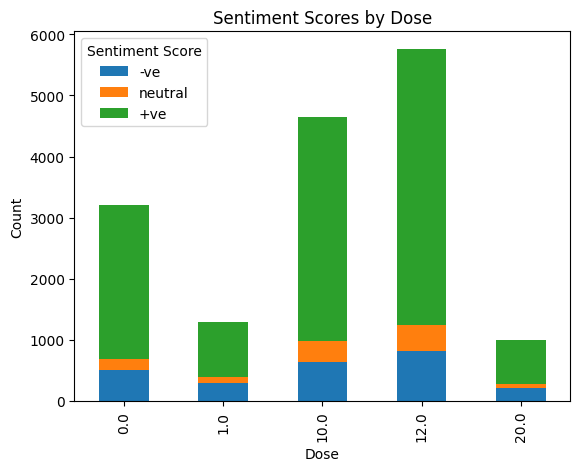

<Figure size 1000x600 with 0 Axes>

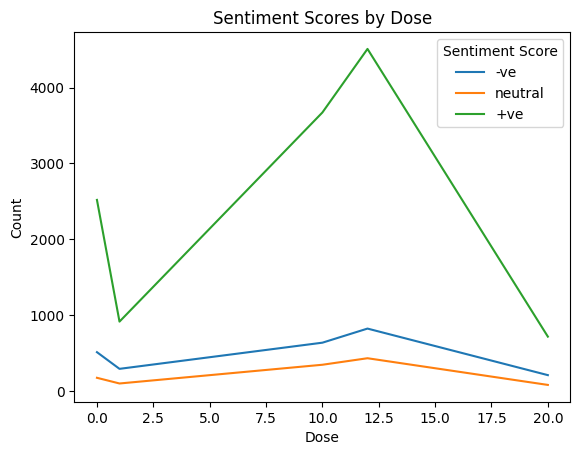

In [23]:
# barchart
plt.figure(figsize=(10, 6))
dose_sentmnt.plot(kind='bar', stacked=True)
plt.title('Sentiment Scores by Dose')
plt.xlabel('Dose')
plt.ylabel('Count')
plt.legend(title='Sentiment Score')
plt.show()

# linechart
plt.figure(figsize=(10, 6))
dose_sentmnt.plot(kind='line')
plt.title('Sentiment Scores by Dose')
plt.xlabel('Dose')
plt.ylabel('Count')
plt.legend(title='Sentiment Score')
plt.show()


In [24]:
"""
3. Then analyze the "review_text" column in the data. In the reviews, ,
 (1) remove high-frequency unnecessary words, such as I, the, is, etc., and find useful hot words, such as good sleep, dissolve, tasty, helpful, no help, etc. and
 (2) use any text analysis tool (such as tfitf, or nltk, etc.) to obtain and analyze words about reaction after eating and evaluation based on doses (such as 1mg, 2mg, 5mg, 10mg, 25mg, etc.).

# Note: Please try your best to ask more questions. Please combine the NumPy, Pandas, visualization and EDA technologies to complete the above requirements.
"""

'\n3. Then analyze the "review_text" column in the data. In the reviews, ,\n (1) remove high-frequency unnecessary words, such as I, the, is, etc., and find useful hot words, such as good sleep, dissolve, tasty, helpful, no help, etc. and\n (2) use any text analysis tool (such as tfitf, or nltk, etc.) to obtain and analyze words about reaction after eating and evaluation based on doses (such as 1mg, 2mg, 5mg, 10mg, 25mg, etc.).\n\n# Note: Please try your best to ask more questions. Please combine the NumPy, Pandas, visualization and EDA technologies to complete the above requirements.\n'

In [25]:
"""
NEXT ---------------------->
STOP WORDS :
Examples:
In English, stop words typically include:

Articles: "a", "an", "the"
Prepositions: "in", "on", "at"
Conjunctions: "and", "but", "or"
Pronouns: "he", "she", "it", "they"
Other common words: "is", "am", "are", "this", "that"

HOT WORDS :
Examples:
In a dataset of product reviews, hot words might include:

Positive terms: "good", "great", "excellent", "love"
Negative terms: "bad", "poor", "terrible", "hate"
Product-specific terms: "battery", "screen", "price", "quality"
Purpose:
Identifying hot words helps in:

Text Analysis: Understanding the key topics or sentiments in the text.
Feature Extraction: Creating meaningful features for machine learning models.


"""

'\nNEXT ---------------------->\nSTOP WORDS :\nExamples:\nIn English, stop words typically include:\n\nArticles: "a", "an", "the"\nPrepositions: "in", "on", "at"\nConjunctions: "and", "but", "or"\nPronouns: "he", "she", "it", "they"\nOther common words: "is", "am", "are", "this", "that"\n\nHOT WORDS :\nExamples:\nIn a dataset of product reviews, hot words might include:\n\nPositive terms: "good", "great", "excellent", "love"\nNegative terms: "bad", "poor", "terrible", "hate"\nProduct-specific terms: "battery", "screen", "price", "quality"\nPurpose:\nIdentifying hot words helps in:\n\nText Analysis: Understanding the key topics or sentiments in the text.\nFeature Extraction: Creating meaningful features for machine learning models.\n\n\n'

In [26]:


s_wds = set(stopwords.words('english')) # load stop words in list ; will be used as look up
df_8_merged['new_reviewed_text'] = df_8_merged['review_text'].apply(lambda x: ' '.join(word for word in str(x).lower().split() if word not in s_wds))





In [27]:
"""
check if the words in review text is in stop word list, if yes then
#remove the stop words from the
review text and store the remaining in rows under new column

"""

'\ncheck if the words in review text is in stop word list, if yes then\n#remove the stop words from the \nreview text and store the remaining in rows under new column\n\n'

In [30]:
df_8_merged['r_wds'] = df_8_merged['review_text'].apply(lambda x: ', '.join(word for word in str(x).lower().split() if word in s_wds))
# Displaying removed words
print("Removed Words:\n", df_8_merged['r_wds'])

Removed Words:
 0                                 these, i, the, than, the
1                                                will, you
2                                               then, most
3                                                        a
4        i, this, i, it, to, at, in, i, this, it, is, v...
                               ...                        
15905                                             than, no
15906    i, was, by, my, i, that, this, has, my, this, ...
15907                                         for, and, is
15908             the, too, but, the, it, to, the, the, be
15909                                                     
Name: r_wds, Length: 15910, dtype: object


In [31]:

# Used CountVectorizer to extract h_wds:
vectorizer = CountVectorizer(max_features=10)
X = vectorizer.fit_transform(df_8_merged['new_reviewed_text'])
h_wds = vectorizer.get_feature_names_out()
print("Useful Hot Words:", h_wds)



Useful Hot Words: ['asleep' 'good' 'great' 'melatonin' 'night' 'product' 'sleep' 'take'
 'work' 'works']


In [32]:
# (2) use any text analysis tool (such as tfitf, or nltk, etc.) to obtain and analyze words about reaction after eating and evaluation based on doses (such as 1mg, 2mg, 5mg, 10mg, 25mg, etc.).

In [33]:
df_8_merged['new_reviewed_text']

0        works great, think gel capsule dissolves much ...
1                               powerful! knock right out!
2                 best melatonin i've tried,so much better
3                           works like charm, great price.
4        love product, use sleep night, every time take...
                               ...                        
15905    best yet 20 mg fall asleep less 30 minutes mor...
15906    recommended melatonin doctor. believe product ...
15907    highest mg ratings lowest $ amount taste also ...
15908    initial taste wasn’t bad, longer took dissolve...
15909                                        great product
Name: new_reviewed_text, Length: 15910, dtype: object

In [34]:
# Function to tokenize text and remove stopwords
def remove_stopwords(text):
    s_wds = set(stopwords.words('english'))
    tokenswords = word_tokenize(str(text).lower())
    return [word for word in tokenswords if word.isalnum() and word not in s_wds]

#Applying tokenization:
df_8_merged['tokenized_text'] = df_8_merged['review_text'].apply(remove_stopwords)

# Extract overall top terms
all_tokens = [token for tokenswords in df_8_merged['tokenized_text'] for token in tokenswords]
overall_freq_dist = FreqDist(all_tokens)
overall_top_terms = overall_freq_dist.most_common(10)  # Adjust the number of terms as needed


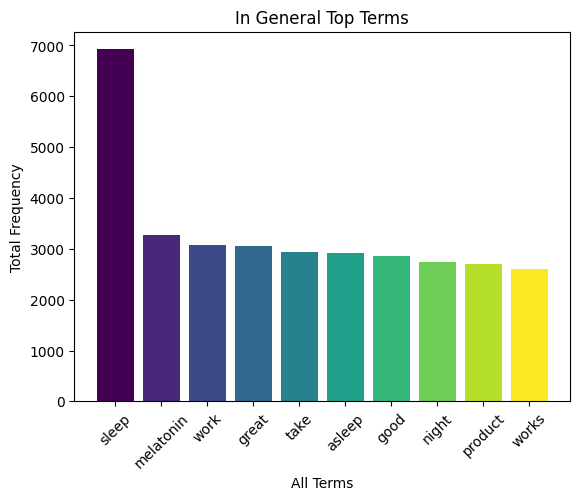

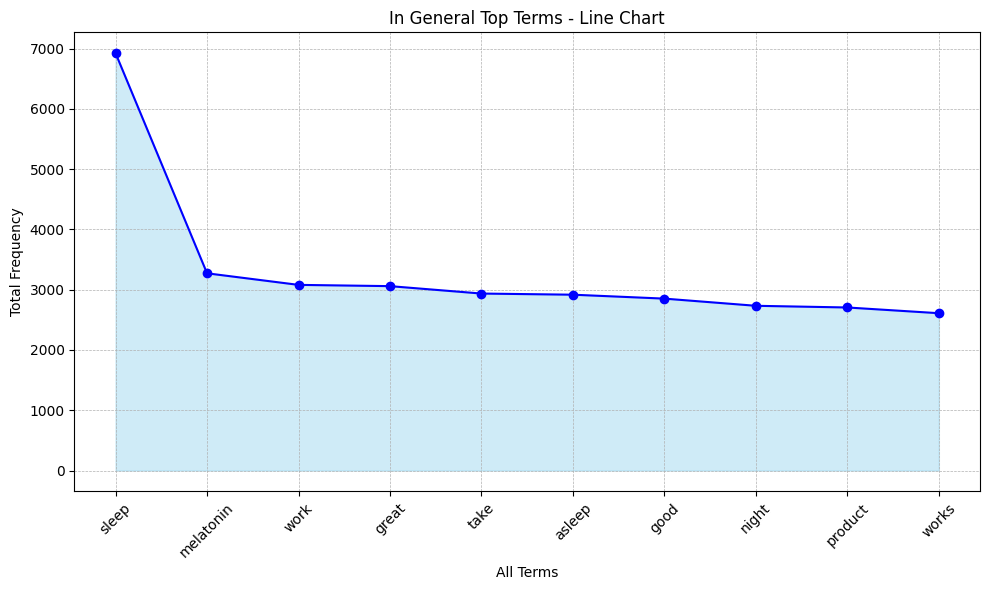

In [35]:

# Plotting a bar chart
terms, frequencies = zip(*overall_top_terms)
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(terms)))  # Choose a colormap, adjust as needed
plt.bar(terms, frequencies, color=bar_colors)
plt.xlabel('All Terms')
plt.ylabel('Total Frequency')
plt.title('In General Top Terms')
plt.xticks(rotation=45)
plt.show()


# Plotting a line chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
terms, frequencies = zip(*overall_top_terms)  # This remains the same
plt.plot(terms, frequencies, marker='o', linestyle='-', color='b')  # Use a marker for each data point
plt.fill_between(terms, frequencies, color="skyblue", alpha=0.4)  # Optional: fill the area under the curve

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add titles and labels
plt.xlabel('All Terms')
plt.ylabel('Total Frequency')
plt.title('In General Top Terms - Line Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show plot
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

Dose: 0.0
Top Terms: [('sleep', 1165), ('melatonin', 755), ('works', 606), ('great', 606), ('work', 591), ('product', 565), ('good', 478), ('night', 473), ('take', 453), ('asleep', 404)]


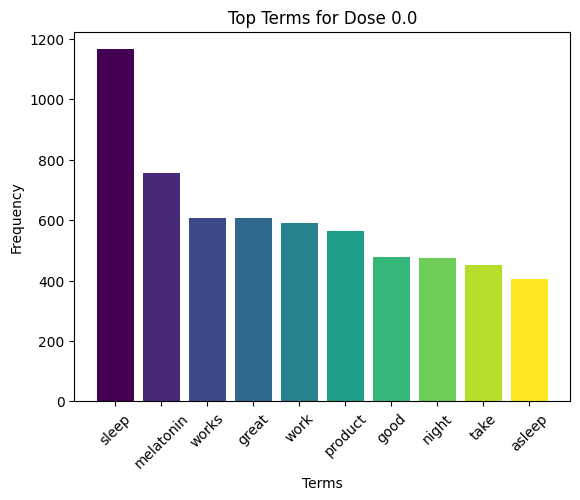

Dose: 10.0
Top Terms: [('sleep', 2108), ('gummies', 1192), ('taste', 1126), ('take', 1055), ('asleep', 1036), ('melatonin', 1035), ('great', 1034), ('work', 992), ('good', 985), ('like', 971)]


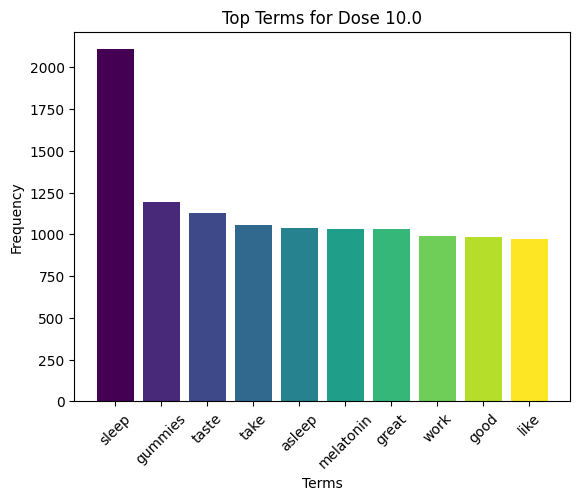

Dose: 12.0
Top Terms: [('sleep', 2604), ('melatonin', 1129), ('great', 1074), ('works', 1061), ('asleep', 1061), ('take', 1032), ('work', 1028), ('good', 1005), ('product', 966), ('night', 945)]


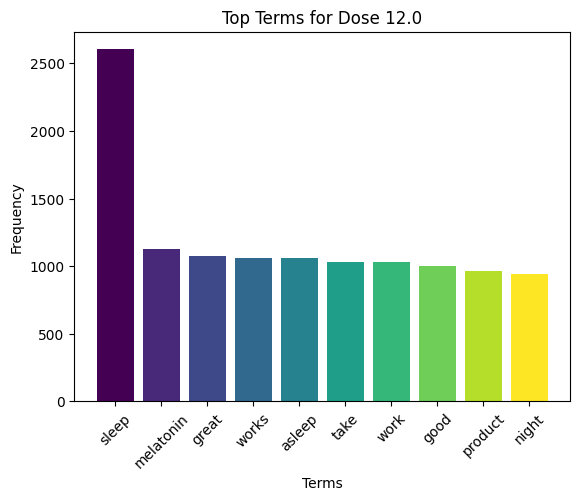

Dose: 1.0
Top Terms: [('sleep', 739), ('work', 326), ('asleep', 306), ('taste', 280), ('take', 270), ('night', 260), ('like', 233), ('good', 226), ('gummies', 224), ('product', 222)]


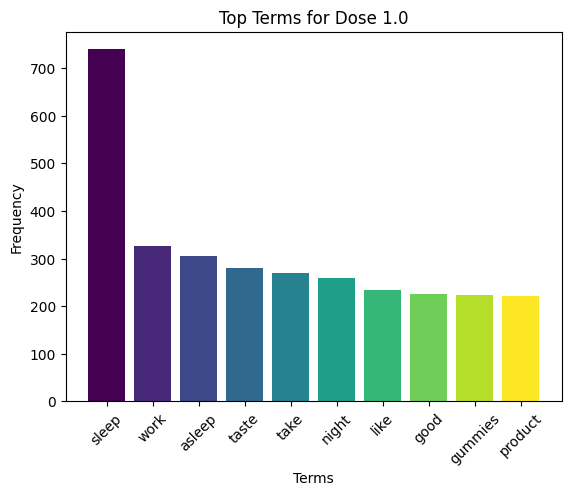

Dose: 20.0
Top Terms: [('sleep', 307), ('product', 190), ('melatonin', 183), ('works', 171), ('taste', 164), ('good', 158), ('great', 145), ('work', 143), ('take', 126), ('night', 120)]


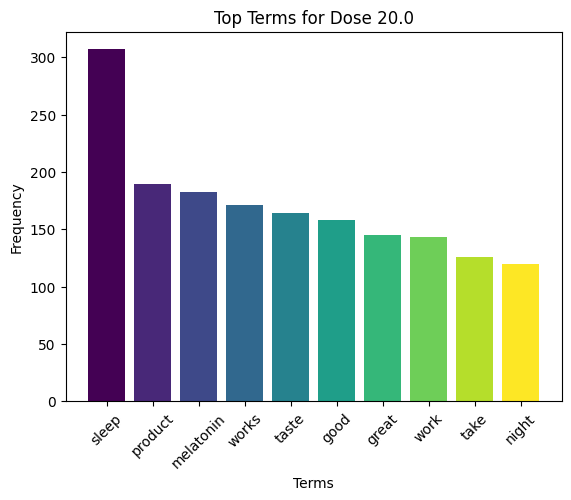

In [36]:
# Extracting all the terms in a dose
terms_by_dose = {}
for dose in df_8_merged['dose'].unique():
    subset_df = df_8_merged[df_8_merged['dose'] == dose]
    all_tokens = [token for tokenswords in subset_df['tokenized_text'] for token in tokenswords]
    freq_dist = FreqDist(all_tokens)
    top_terms = freq_dist.most_common(10)
    terms_by_dose[dose] = top_terms

# Display the extracted terms for each dose
for dose, terms in terms_by_dose.items():
    print(f"Dose: {dose}")
    print("Top Terms:", terms)

    # Plotting a bar chart with different colors for each bar
    if terms:
        terms, frequencies = zip(*terms)
        bar_colors = plt.cm.viridis(np.linspace(0, 1, len(terms)))
        plt.bar(terms, frequencies, color=bar_colors)
        plt.xlabel('Terms')
        plt.ylabel('Frequency')
        plt.title(f'Top Terms for Dose {dose}')
        plt.xticks(rotation=45)
        plt.show()

#     print("\n")

In [37]:
df_8_merged

asin                                      product_title  \
0      B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1      B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2      B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3      B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4      B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
...           ...                                                ...   
15905  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15906  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15907  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15908  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   
15909  B08CGYFB2Q  Vitamatic Melatonin 20mg Tablets | Vegetarian,...   

       average_rating  total_reviews  review_rating  \
0                 4.6           3273              4   
1                 4.6           3273              4   
2                 4.6           3273              5   
3                 4.6           3273              5   
4                 4.6           3273              5   
...               ...            ...            ...   
15905             4.5           1033              5   
15906             4.5           1033              5   
15907             4.5           1033              5   
15908             4.5           1033              2   
15909             4.5           1033              5   

                                             review_text  \
0      These works great, I think the gel capsule dis...   
1                    Powerful! Will knock you right out!   
2      Best melatonin I've tried,so much better then ...   
3                       Works like a charm, great price.   
4      I love this product, I use it to sleep at nigh...   
...                                                  ...   
15905  BEST YET 20 MG FALL ASLEEP LESS THAN 30 MINUTE...   
15906  I was recommended melatonin by my Doctor. I be...   
15907  Highest mg ratings for lowest $ amount and tas...   
15908  The initial taste wasn’t too bad, but the long...   
15909                                      Great product   

                                           review_header  \
0      Max dose and it hits faster than other quick r...   
1                                              Powerful!   
2                                                Amazing   
3                                             Five Stars   
4       This is one great product, people should try it.   
...                                                  ...   
15905                                         SLEEP EASY   
15906                                     Performed well   
15907                                     More Mg less $   
15908                                              Yuck!   
15909          Fast acting no morning after sluggishness   

      no_of_people_reacted_helpful  dose  Sentmnt_Val  \
0                              NaN   0.0     0.500000   
1                              NaN   0.0     0.366071   
2                              NaN   0.0     0.666667   
3                              NaN   0.0     0.800000   
4                              NaN   0.0     0.320833   
...                            ...   ...          ...   
15905                          1.0  20.0     0.416667   
15906                          NaN  20.0     0.000000   
15907                          NaN  20.0     1.000000   
15908                          NaN  20.0    -0.366667   
15909                          NaN  20.0     0.800000   

                                       new_reviewed_text  \
0      works great, think gel capsule dissolves much ...   
1                             powerful! knock right out!   
2               best melatonin i've tried,so much better   
3                         works like charm, great price.   
4      love product, use sleep night, every time take...   


In [38]:
# 4. The data is divided into a training set and a test set, and two ML classification models are used for training and prediction with accuracy evaluation. The requirement is: you can analyze (train and predict) the choice of different doses based on factors that you analyze above.



In [39]:
# Ignoring few specific warnings:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [40]:
# Selecting a feature:
A = df_8_merged[['average_rating', 'Sentmnt_Val', 'new_reviewed_text']]

In [41]:
# Selecting a Target variable:
B = df_8_merged['dose']

In [42]:
A

average_rating  Sentmnt_Val  \
0                 4.6     0.500000   
1                 4.6     0.366071   
2                 4.6     0.666667   
3                 4.6     0.800000   
4                 4.6     0.320833   
...               ...          ...   
15905             4.5     0.416667   
15906             4.5     0.000000   
15907             4.5     1.000000   
15908             4.5    -0.366667   
15909             4.5     0.800000   

                                       new_reviewed_text  
0      works great, think gel capsule dissolves much ...  
1                             powerful! knock right out!  
2               best melatonin i've tried,so much better  
3                         works like charm, great price.  
4      love product, use sleep night, every time take...  
...                                                  ...  
15905  best yet 20 mg fall asleep less 30 minutes mor...  
15906  recommended melatonin doctor. believe product ...  
15907  highest mg ratings lowest $ amount taste also ...  
15908  initial taste wasn’t bad, longer took dissolve...  
15909                                      great product  

[15910 rows x 3 columns]

In [ ]:
B

In [44]:
# Categorizing the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [45]:
# Using TfidfVectorizer to convert the processed review into numericalform:
vectorizer = TfidfVectorizer(max_features=100, max_df=0.8, stop_words='english')
A_train_tfidf = vectorizer.fit_transform(A_train['new_reviewed_text'])
A_test_tfidf = vectorizer.transform(A_test['new_reviewed_text'])

In [46]:
# Add other features to the TF-IDF features
A_train_features = pd.concat([A_train[['average_rating', 'Sentmnt_Val']].reset_index(drop=True),
                              pd.DataFrame(A_train_tfidf.toarray())], axis=1)
A_test_features = pd.concat([A_test[['average_rating', 'Sentmnt_Val']].reset_index(drop=True),
                             pd.DataFrame(A_test_tfidf.toarray())], axis=1)

In [47]:
# Convert feature names to strings
A_train_features.columns = A_train_features.columns.astype(str)
A_test_features.columns = A_test_features.columns.astype(str)

In [48]:
#Random Forest Classifier

In [49]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(A_train_features, B_train)

best_rf_model = grid_search_rf.best_estimator_

# Predict with the best Random Forest model
B_pred_rf = best_rf_model.predict(A_test_features)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(B_test, B_pred_rf)
print("Accuracy :", accuracy_rf)
print("Classification Report :\n", classification_report(B_test, B_pred_rf))

Accuracy : 0.7649277184160905
Classification Report :
               precision    recall  f1-score   support

         0.0       0.77      0.95      0.85       613
         1.0       0.72      0.20      0.31       253
        10.0       0.84      0.81      0.82       955
        12.0       0.72      0.88      0.79      1164
        20.0       0.75      0.02      0.03       197

    accuracy                           0.76      3182
   macro avg       0.76      0.57      0.56      3182
weighted avg       0.77      0.76      0.73      3182



In [50]:
# Evaluate Random Forest model
accuracy_rf = accuracy_score(B_test, B_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7649277184160905


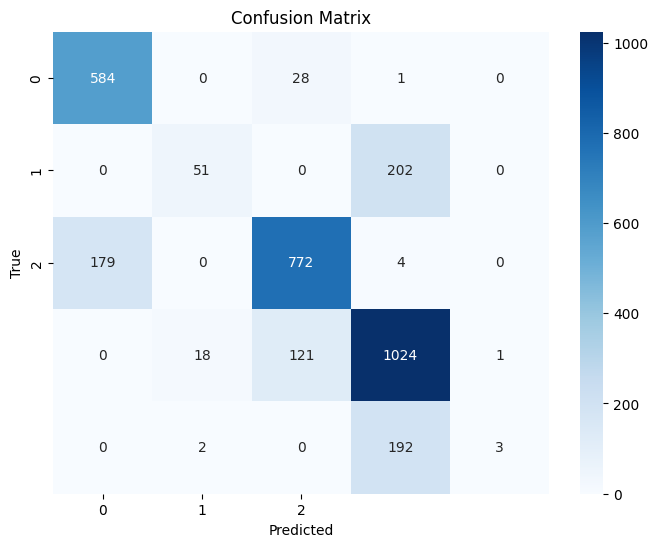

In [51]:
# Calculate the confusion matrix
cm = confusion_matrix(B_test, B_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [52]:
#Logistic Regression

In [53]:
# Standardize features
scaler = StandardScaler()
A_train_features_scaled = scaler.fit_transform(A_train_features)
A_test_features_scaled = scaler.transform(A_test_features)

# Hyperparameter tuning for Logistic Regression
# param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                      'penalty': ['l1', 'l2'],
#                      'solver': ['lbfgs', 'newton-cg', 'sag'],
#                      'max_iter': [100, 500, 1000, 1500]}
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l2'],
                     'solver': ['lbfgs', 'newton-cg', 'sag'],
                     'max_iter': [100, 500, 1000, 1500]}


grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
grid_search_logreg.fit(A_train_features_scaled, B_train)

best_logreg_model = grid_search_logreg.best_estimator_

# Predict with the best Logistic Regression model
B_pred_logreg = best_logreg_model.predict(A_test_features_scaled)

# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(B_test, B_pred_logreg)
print("Accuracy :", accuracy_logreg)
print("Classification Report :\n", classification_report(B_test, B_pred_logreg))


Accuracy : 0.7297297297297297
Classification Report :
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       613
         1.0       0.72      0.23      0.35       253
        10.0       0.82      0.79      0.80       955
        12.0       0.67      0.87      0.75      1164
        20.0       0.44      0.02      0.04       197

    accuracy                           0.73      3182
   macro avg       0.68      0.54      0.55      3182
weighted avg       0.72      0.73      0.70      3182



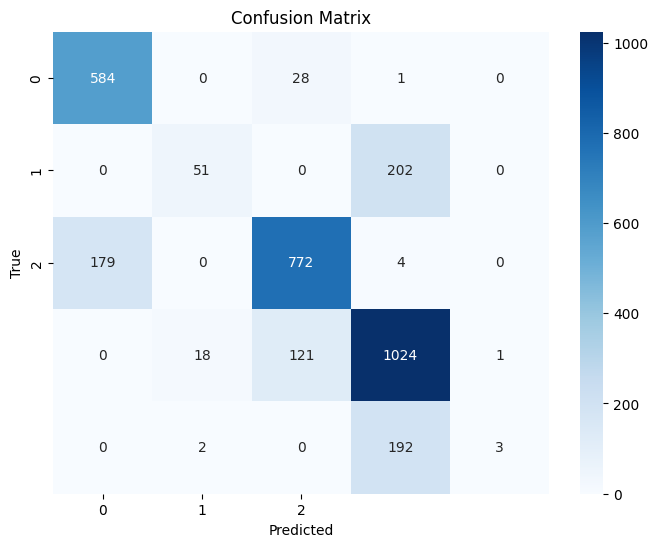

In [54]:
# Calculate the confusion matrix
cm = confusion_matrix(B_test, B_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [59]:
print("end")

end
